In [2]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import datetime

In [4]:
# define instruments to download
companies_dict = {
'Advanced Micro Devices Inc'	:'AMD',
'Adobe Inc.'	:'ADBE',
'Align Technology Inc'	:'ALGN',
'Amazon.com Inc'	:'AMZN',
'Amgen Inc'	:'AMGN',
'American Electric Power Company Inc'	:'AEP',
'Analog Devices Inc'	:'ADI',
'ANSYS Inc'	:'ANSS',
'Apple Inc'	:'AAPL',
'Applied Materials Inc'	:'AMAT',
'ASML Holding NV'	:'ASML',
'Atlassian Corporation PLC'	:'TEAM',
'Autodesk Inc'	:'ADSK',
'Activision Blizzard Inc'	:'ATVI',
'Automatic Data Processing Inc'	:'ADP',
'Broadcom Inc'	:'AVGO',
'Baidu Inc'	:'BIDU',
'Biogen Inc'	:'BIIB',
'Biomarin Pharmaceutical Inc'	:'BMRN',
'Booking Holdings Inc'	:'BKNG',
'Cadence Design Systems Inc'	:'CDNS',
'CDW Corp'	:'CDW',
'Cerner Corp'	:'CERN',
'Check Point Software Technologies Ltd'	:'CHKP',
'Charter Communications Inc'	:'CHTR',
'Copart Inc'	:'CPRT',
'CrowdStrike Holdings Inc'	:'CRWD',
'Cintas Corp'	:'CTAS',
'Cisco Systems Inc'	:'CSCO',
'Comcast Corp'	:'CMCSA',
'Costco Wholesale Corp'	:'COST',
'CSX Corp'	:'CSX',
'Cognizant Technology Solutions Corp'	:'CTSH',
'DocuSign Inc'	:'DOCU',
'Dexcom Inc'	:'DXCM',
'Dollar Tree Inc'	:'DLTR',
'Electronic Arts'	:'EA',
'eBay Inc'	:'EBAY',
'Exelon Corp'	:'EXC',
'Fastenal Co'	:'FAST',
'Facebook'	:'FB',
'Fiserv Inc'	:'FISV',
'Fox Corp. Class B'	:'FOX',
'Fox Corp. Class A'	:'FOXA',
'Gilead Sciences Inc'	:'GILD',
'Alphabet Class C'	:'GOOG',
'Alphabet Class A'	:'GOOGL',
'Honeywell International Inc'	:'HON',
'Illumina Inc'	:'ILMN',
'Incyte Corp'	:'INCY',
'Intel Corp'	:'INTC',
'Intuit Inc'	:'INTU',
'Intuitive Surgical Inc'	:'ISRG',
'Marvell Technology Inc'	:'MRVL',
'IDEXX Laboratories Inc'	:'IDXX',
'JD.Com Inc'	:'JD',
'Keurig Dr Pepper Inc'	:'KDP',
'KLA Corp'	:'KLAC',
'Kraft Heinz Co'	:'KHC',
'Lam Research Corp'	:'LRCX',
'Lululemon Athletica Inc'	:'LULU',
'Mercadolibre Inc'	:'MELI',
'Marriott International Inc'	:'MAR',
'Match Group Inc'	:'MTCH',
'Microchip Technology Inc'	:'MCHP',
'Mondelez International Inc'	:'MDLZ',
'Moderna Inc'	:'MRNA',
'Monster Beverage Corp'	:'MNST',
'Microsoft Corp'	:'MSFT',
'Micron Technology Inc'	:'MU',
'Netflix Inc'	:'NFLX',
'NetEase Inc'	:'NTES',
'NVIDIA Corp'	:'NVDA',
'NXP Semiconductors NV'	:'NXPI',
'Okta Inc'	:'OKTA',
'O’Reilly Automotive Inc'	:'ORLY',
'Paychex Inc'	:'PAYX',
'Paccar Inc'	:'PCAR',
'Pinduoduo Inc'	:'PDD',
'Peloton Interactive Inc'	:'PTON',
'PayPal Holdings Inc'	:'PYPL',
'PepsiCo Inc.'	:'PEP',
'Qualcomm Inc'	:'QCOM',
'Regeneron Pharmaceuticals Inc'	:'REGN',
'Ross Stores Inc'	:'ROST',
'Sirius XM Holdings Inc'	:'SIRI',
'Seagen Inc'	:'SGEN',
'Splunk Inc'	:'SPLK',
'Skyworks Solutions Inc'	:'SWKS',
'Starbucks Corp'	:'SBUX',
'Synopsys Inc'	:'SNPS',
'Trip.com Group Ltd'	:'TCOM',
'Tesla Inc'	:'TSLA',
'Texas Instruments Inc'	:'TXN',
'T-Mobile US Inc'	:'TMUS',
'Verisign Inc'	:'VRSN',
'Verisk Analytics Inc'	:'VRSK',
'Vertex Pharmaceuticals Inc'	:'VRTX',
'Walgreens Boots Alliance Inc'	:'WBA',
'Workday Inc'	:'WDAY',
'Xcel Energy Inc'	:'XEL',
'Xilinx Inc'	:'XLNX',
'Zoom Video Communications Inc'	:'ZM'
}
companies = sorted(companies_dict.items(), key=lambda x: x[1])


In [5]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2020-01-01'
end_date = '2021-01-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None), MultiIndex([('Adj Close',  'AMD'),
            ('Adj Close', 'ADBE'),
            ('Adj Close', 'ALGN'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'AMGN'),
            ('Adj Close',  'AEP'),
            ('Adj Close',  'ADI'),
            ('Adj Close', 'ANSS'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'AMAT'),
            ...
            (   'Volume',  'TXN'),
            (   'Volume', 'TMUS'),
            (   'Volume', 'VRSN'),
            (   'Volume', 'VRSK'),
            (   'Volume', 'V

In [6]:

# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AMD       49.099998
ADBE     334.429993
ALGN     283.679993
AMZN    1898.010010
AMGN     240.100006
           ...     
WBA       59.080002
WDAY     167.460007
XEL       62.380001
XLNX     101.650002
ZM        68.720001
Name: 2020-01-02 00:00:00, Length: 103, dtype: float64


In [7]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

In [8]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))


Company: Apple Inc, Change: 5.219978332519531
Company: Adobe Inc., Change: 28.29010009765625
Company: Analog Devices Inc, Change: 160.2300262451172
Company: Automatic Data Processing Inc, Change: -37.7210693359375
Company: Autodesk Inc, Change: 22.130035400390625
Company: American Electric Power Company Inc, Change: 1.7500457763671875
Company: Align Technology Inc, Change: -1.949951171875
Company: Applied Materials Inc, Change: 77.98977661132812
Company: Advanced Micro Devices Inc, Change: 20.089900970458984
Company: Amgen Inc, Change: 5.7200469970703125
Company: Amazon.com Inc, Change: 72.94966125488281
Company: ANSYS Inc, Change: 84.06490325927734
Company: ASML Holding NV, Change: 53.659820556640625
Company: Activision Blizzard Inc, Change: 15.170028686523438
Company: Broadcom Inc, Change: 16.76995849609375
Company: Baidu Inc, Change: 35.26031494140625
Company: Biogen Inc, Change: 80.45001983642578
Company: Booking Holdings Inc, Change: 42.560089111328125
Company: Biomarin Pharmaceut

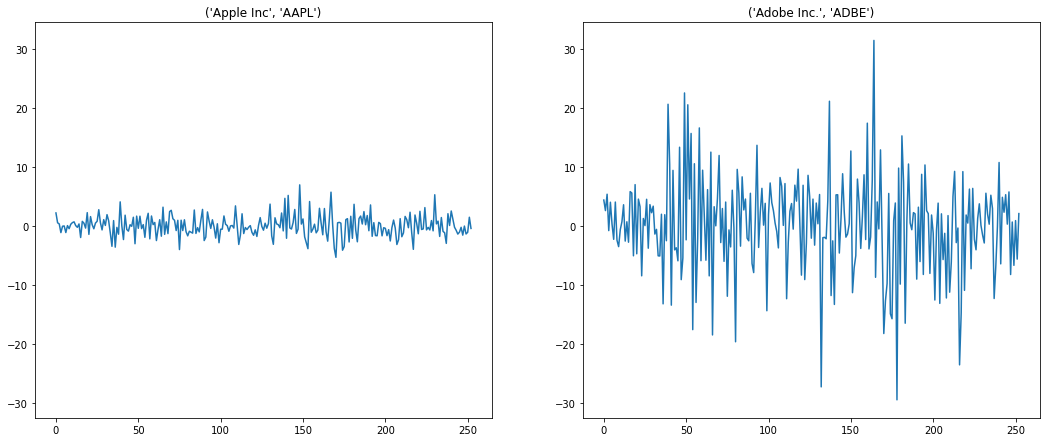

In [9]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [10]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.7040985572615831
-0.5506584941994829
0.0016330007866415534


In [11]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [12]:
panel_data

Attributes  Adj Close                                                   \
Symbols           AMD        ADBE        ALGN         AMZN        AMGN   
Date                                                                     
2020-01-02  49.099998  334.429993  283.679993  1898.010010  228.533554   
2020-01-03  48.599998  331.809998  280.440002  1874.969971  226.982071   
2020-01-06  48.389999  333.709991  285.880005  1902.880005  228.723892   
2020-01-07  48.250000  333.390015  283.059998  1906.859985  226.572769   
2020-01-08  47.830002  337.869995  286.000000  1891.969971  226.744110   
...               ...         ...         ...          ...         ...   
2020-12-24  91.809998  499.859985  528.030029  3172.689941  218.055740   
2020-12-28  91.599998  498.950012  520.859985  3283.959961  218.760010   
2020-12-29  90.620003  502.109985  520.450012  3322.000000  221.909592   
2020-12-30  92.290001  497.450012  524.320007  3285.850098  222.203033   
2020-12-31  91.709999  500.119995  534.380005  3256.929932  224.892914   

Attributes                                                            ...  \
Symbols           AEP         ADI        ANSS        AAPL       AMAT  ...   
Date                                                                  ...   
2020-01-02  88.182381  116.506660  259.589996   74.096458  61.037251  ...   
2020-01-03  88.088028  114.455727  256.970001   73.376076  60.065750  ...   
2020-01-06  88.380516  113.111015  254.589996   73.960762  58.770428  ...   
2020-01-07  88.399391  115.684357  256.670013   73.612930  60.468086  ...   
2020-01-08  88.135208  116.729179  257.730011   74.797089  60.428833  ...   
...               ...         ...         ...         ...        ...  ...   
2020-12-24  79.335869  142.645370  364.170013  131.352829  84.864464  ...   
2020-12-28  79.199448  142.852707  363.720001  136.050766  84.406975  ...   
2020-12-29  79.102013  141.845627  360.850006  134.239273  83.810242  ...   
2020-12-30  79.423569  144.333771  362.320007  133.094650  86.505463  ...   
2020-12-31  81.138512  145.864197  363.799988  132.069473  85.829170  ...   

Attributes     Volume                                                         \
Symbols           TXN       TMUS      VRSN       VRSK       VRTX         WBA   
Date                                                                           
2020-01-02  4614000.0  3392700.0  369400.0   845100.0  1334300.0   5700500.0   
2020-01-03  4057200.0  1831900.0  912100.0   876900.0   943400.0   4892300.0   
2020-01-06  4345400.0  2675300.0  615700.0   656200.0  1436600.0   6003300.0   
2020-01-07  7184100.0  3262400.0  418600.0  1514700.0  1027700.0   4365700.0   
2020-01-08  3546900.0  3037400.0  705200.0   773100.0  1802600.0  17431800.0   
...               ...        ...       ...        ...        ...         ...   
2020-12-24  1044400.0   901100.0  139900.0   145000.0   451700.0   2678000.0   
2020-12-28  2139300.0  2569100.0  296500.0   917700.0   903200.0   4714500.0   
2020-12-29  2433700.0  1672500.0  287100.0   415800.0   656600.0   4004400.0   
2020-12-30  2213800.0  1673100.0  248500.0   339900.0   819100.0   4194300.0   
2020-12-31  2906200.0  2080600.0  311100.0   358200.0  1161100.0   7696000.0   

Attributes                                              
Symbols          WDAY        XEL       XLNX         ZM  
Date                                                    
2020-01-02  1503000.0  2915400.0  3234100.0  1315500.0  
2020-01-03  1276300.0  2422500.0  3521900.0  1127900.0  
2020-01-06  1623300.0  2217100.0  2832700.0  3151600.0  
2020-01-07  2404100.0  1861100.0  3050000.0  6985400.0  
2020-01-08  2819900.0  4828900.0  2172900.0  2482300.0  
...               ...        ...        ...        ...  
2020-12-24   599900.0   598400.0  1167500.0  3850700.0  
2020-12-28  1139100.0  1799800.0  1978500.0  9454800.0  
2020-12-29  1407900.0  1761400.0  1489900.0  6080300.0  
2020-12-30  1140400.0  1296400.0  2892600.0  5474500.0  
2020-12-31  1329600.0 

In [13]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=10))])

In [14]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

     labels                                    companies
9         0                            (Amgen Inc, AMGN)
101       0                           (Xilinx Inc, XLNX)
69        0                          (Netflix Inc, NFLX)
93        0                            (Tesla Inc, TSLA)
15        0                            (Baidu Inc, BIDU)
..      ...                                          ...
85        8                           (Seagen Inc, SGEN)
84        8                       (Starbucks Corp, SBUX)
25        8                (Costco Wholesale Corp, COST)
31        8  (Cognizant Technology Solutions Corp, CTSH)
16        9                           (Biogen Inc, BIIB)

[103 rows x 2 columns]


In [15]:
display(new)

array([[ 0.07674079,  0.0195278 ,  0.01267591, ..., -0.03562972,
         0.05173164, -0.01336111],
       [ 0.03371016,  0.02008904,  0.04124352, ...,  0.00715274,
        -0.04261318,  0.01620834],
       [ 0.01953706,  0.01055637,  0.07247687, ..., -0.03521403,
         0.01599239,  0.05916318],
       ...,
       [-0.05530905,  0.01890918, -0.00803628, ..., -0.00378191,
         0.00614569,  0.04349086],
       [ 0.07529713, -0.03734754, -0.01807126, ..., -0.06174373,
         0.05481653, -0.00993928],
       [-0.00047646, -0.00202493,  0.02197615, ...,  0.01840276,
        -0.0298972 , -0.08605822]])

In [21]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labbels
print(df.sort_values('labels'))

    labels                                    companies
51       0                           (Intuit Inc, INTU)
24       0                        (Comcast Corp, CMCSA)
23       0           (Charter Communications Inc, CHTR)
86       0               (Sirius XM Holdings Inc, SIRI)
67       0                      (Match Group Inc, MTCH)
..     ...                                          ...
31       4  (Cognizant Technology Solutions Corp, CTSH)
47       4               (IDEXX Laboratories Inc, IDXX)
32       4                      (Dollar Tree Inc, DLTR)
21       4                          (Cerner Corp, CERN)
25       4                (Costco Wholesale Corp, COST)

[103 rows x 2 columns]


In [17]:
reduced_data


array([[ 3.13026419e-01,  7.58469477e-02],
       [ 3.58699284e-01, -5.52353091e-02],
       [-8.67249611e-02,  1.87089393e-01],
       [ 3.88341381e-01, -5.64493335e-02],
       [-1.24186695e-01, -4.23994598e-01],
       [-3.73212731e-01, -4.12768879e-01],
       [-1.30835453e-01,  3.20849525e-01],
       [ 1.15204274e-01, -8.99588822e-02],
       [ 1.31204269e-01,  6.29878779e-03],
       [-9.14773814e-02,  3.24561703e-01],
       [ 1.51170507e-01,  2.80018279e-01],
       [ 4.85426444e-01, -1.98325740e-02],
       [ 1.95991276e-01,  1.09142481e-01],
       [ 3.08871154e-01, -3.29974861e-01],
       [-3.82926220e-01, -8.57012213e-02],
       [-6.30486186e-02,  3.22650993e-01],
       [ 8.77325544e-02,  1.97105851e-01],
       [-8.03981650e-03, -2.92263824e-01],
       [ 9.55600362e-03, -1.79813521e-01],
       [-2.40244095e-01,  3.23393257e-01],
       [ 2.52231647e-01,  3.99130513e-02],
       [-3.02271300e-01,  4.70000056e-02],
       [-2.82932540e-01, -2.57189945e-01],
       [-3.

In [18]:
data_df = pd.DataFrame(reduced_data, columns=["PC 1", "PC 2"])
print(data_df.shape)
data_df.head(10)

(103, 2)


,PC 1,PC 2
0,0.313026,0.075847
1,0.358699,-0.055235
2,-0.086725,0.187089
3,0.388341,-0.056449
4,-0.124187,-0.423995
5,-0.373213,-0.412769
6,-0.130835,0.320850
7,0.115204,-0.089959
8,0.131204,0.006299
9,-0.091477,0.324562


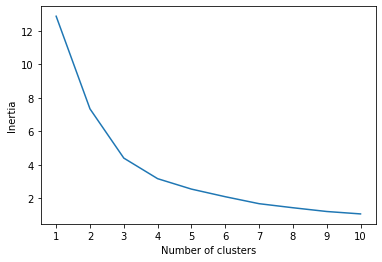

In [19]:
# Initialize empty inertia list
distortions=[]
inertia = []
# Initialize k range
k = list(range(1,11))
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, km.cluster_centers_,
                                        'euclidean'), axis=1)) / new.shape[0])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<Figure size 432x288 with 0 Axes>

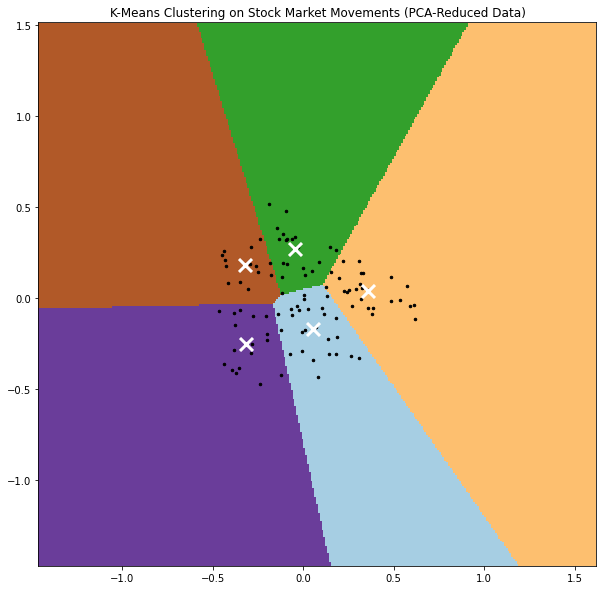

In [22]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()